<strong><center><h1>TP 1 Deep Learning</h1></center></strong>

#Buzura Darius

# Exercise: Tabular data

**PREDICT THE TEMPERATURE**<br>

1. Load the dataset weatherHistory_bis.csv using pandas<br>

2. Use seaborn or matplotlib to visualize the relationship between variables and the target Temperature.<br>

3. Normalize the data using MinMaxScaler<br>

4. Split the dataset into train and test sets<br>

5. Create your own model to predict the Temperature using mean_square_error for loss and adam for optimizer (make sure to save history in fit)

6. Visualize the curve of loss and val_loss

7. Evaluate the model on the test dataset using loss (mse) and $r^2$ (determination coefficient).

8. Visualize the difference between Temperature predictions and right tenmperatures on the test dataset

9. Create a function to predict the temperature on a given features

In [16]:
#Je souhaite connaitre mon emplacement courant pour aller chercher les données sur mon drive
!pwd

/content


In [7]:
#code generé automatiquement
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
#Les import
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

1. Load the dataset weatherHistory_bis.csv using pandas

In [23]:
#chargement du fichier
data = pd.read_csv("drive/MyDrive/Colab Notebooks/weatherHistory_bis.csv")
print(data.columns)

Index(['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Temperature (C)', 'Visibility (km)', 'Pressure (millibars)'],
      dtype='object')


2. Use seaborn or matplotlib to visualize the relationship between variables and the target Temperature.

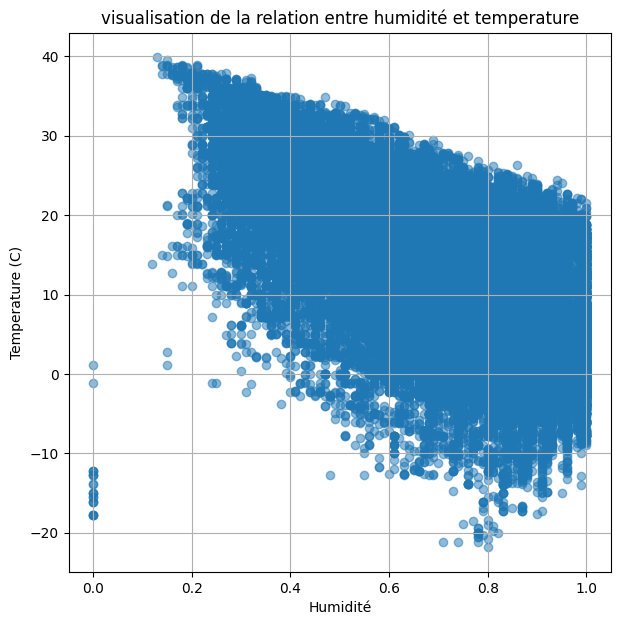

In [30]:
#j'ai utilisé matplotlib pour visaliser les données
plt.figure(figsize=(7, 7))
plt.scatter(data['Humidity'], data['Temperature (C)'], alpha=0.5)
plt.title('visualisation de la relation entre humidité et temperature')
plt.xlabel('Humidité')
plt.ylabel('Temperature (C)')
plt.grid(True)
plt.show()

3. Normalize the data using MinMaxScaler

In [35]:
scaler = MinMaxScaler()
columnsAnormaliser = ['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']
data[columnsAnormaliser] = scaler.fit_transform(data[columnsAnormaliser])

4. Split the dataset into train and test sets

In [38]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

# Exercise: Movie review classification

**Movie review classification**

In this exercise, we will use a dataset in tensorflow-datasets (tfds) and a pretrained model to encode our texts in mdb_reviews.<br>

1. Import the necessary packages (tensorflow, tensorflow-datasets and tensorflow_hubs) <br>

2. Load the dataset mdb_reviews with tfds

3. print the 10 first reviews on the dataset

4. Load the pretrained model with hub on https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1 (don't download the model)

5. Create a model for predicting the review text by using the pretrained model as Input layer and add other layers after.

7. Evaluate the model on test_data

6. Give some reviews (texts) and evaluate your model

In [1]:
# 1. Import the necessary packages (tensorflow, tensorflow-datasets and tensorflow_hubs)
import tensorflow as tf
import tensorflow_datasets as tfds # to use tensorflow prebuilt datasets
import tensorflow_hub as hub # Contains presaved models for transfer learning

In [2]:
# 2. Load the dataset mdb_reviews with tfds
train_data, validation_data, test_data = tfds.load(name="imdb_reviews",split=('train[:60%]', 'train[60%:]', 'test'), as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteRP28WQ/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteRP28WQ/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteRP28WQ/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [3]:
# 3. the 10 first reviews:
# Since our result dataset are not of type list or dictionary we will get data as below
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))
print('train_examples_batch= %s' % (train_examples_batch))
print('train_labels_batch= %s' % (train_labels_batch))

train_examples_batch= tf.Tensor(
[b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
 b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film wa

In [4]:
# 4. Load the pretrained model
pretrained_model = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(pretrained_model, input_shape=[], dtype=tf.string, trainable=True)
# hub_layer is or input layer which converts text inti vectors

# Correction Controle Machine Learning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the Wine Quality dataset
data = load_wine()
wine_df = pd.DataFrame(data.data, columns=data.feature_names)
wine_df['target'] = data.target

# Task 1: Data Loading and Exploration
# Explore the dataset
print(wine_df.head())
print(wine_df.describe())

# Task 2: Supervised Learning (Classification)
# Split the data into features and target variable
X = wine_df.drop('target', axis=1)
y = wine_df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a classification model (Random Forest) and train it
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# Task 3: Unsupervised Learning (Dimensionality Reduction)
# Perform Principal Component Analysis (PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Visualize the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Task 4: Unsupervised Learning (Clustering)
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
wine_df['cluster'] = kmeans.fit_predict(X_scaled)

# Evaluate clustering using silhouette score
silhouette_avg = silhouette_score(X_scaled, wine_df['cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Task 5: Combined Supervised and Unsupervised Learning
# Add cluster labels as an additional feature to X
X['cluster'] = wine_df['cluster']

# Re-train the classification model with the added feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (with cluster feature): {accuracy:.2f}")
print(classification_report(y_test, y_pred))